In [1]:
#Step 1  imports librarary
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
# Evaluation
from sklearn.metrics import root_mean_squared_error,r2_score,mean_squared_error,mean_absolute_error

In [2]:
# Step 2 reading data 
df=pd.read_csv("Data/Advertising.csv")
print(df.head())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
df.shape

(200, 5)

In [4]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Checking null value
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


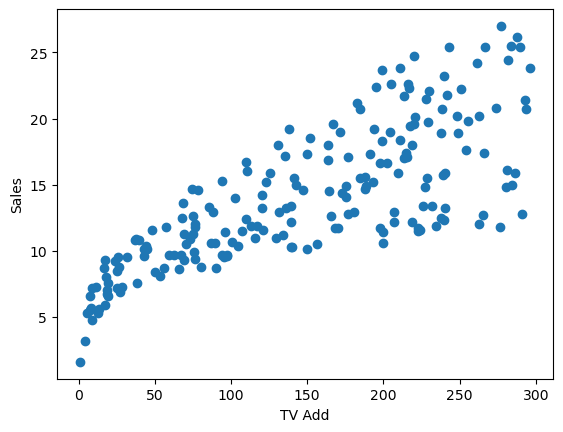

In [7]:
# Checking Linear Regression
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV Add')
plt.ylabel('Sales')
plt.show()

In [8]:
# Train the Model

In [9]:
# Segrate independent and depentdent variable
x=df['TV'].values.reshape(-1,1)
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 1

In [10]:
y=df['Sales'].values.reshape(-1,1)
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [11]:
# Train the Model 
lr=LinearRegression()
lr.fit(x,y)         # training of model

LinearRegression()

In [12]:
y_pred=lr.predict(x)
print(y_pred)

[[17.97077451]
 [ 9.14797405]
 [ 7.85022376]
 [14.23439457]
 [15.62721814]
 [ 7.44616232]
 [ 9.76595037]
 [12.74649773]
 [ 7.44140866]
 [16.53041431]
 [10.17476548]
 [17.23871025]
 [ 8.16396559]
 [11.66741599]
 [16.73482186]
 [16.32125309]
 [10.25557777]
 [20.40940417]
 [10.32212907]
 [14.03474068]
 [17.41459582]
 [18.31779199]
 [ 7.6600772 ]
 [17.88520856]
 [ 9.99412625]
 [19.52997632]
 [13.82557947]
 [18.44614092]
 [18.85970969]
 [10.38868036]
 [20.95607553]
 [12.39948025]
 [11.653155  ]
 [19.65832525]
 [11.58185004]
 [20.85149492]
 [19.72012288]
 [10.58358059]
 [ 9.08142275]
 [17.87094757]
 [16.65876324]
 [15.44657891]
 [20.98935118]
 [16.86792445]
 [ 8.22576322]
 [15.35625929]
 [11.2966302 ]
 [18.43663359]
 [17.83291826]
 [10.21279479]
 [16.53041431]
 [11.80527225]
 [17.31952254]
 [15.71278409]
 [19.52046899]
 [16.48763133]
 [ 7.37961102]
 [13.50708398]
 [17.05331735]
 [17.04856369]
 [ 9.57580381]
 [19.45391769]
 [18.4081116 ]
 [11.91460652]
 [13.26464711]
 [10.31262174]
 [ 8.52999

In [13]:
# Co efficient of linear regrssion 
print(f"B1 : {lr.coef_}")
print(f"B0 : {lr.intercept_}")

B1 : [[0.04753664]]
B0 : [7.03259355]


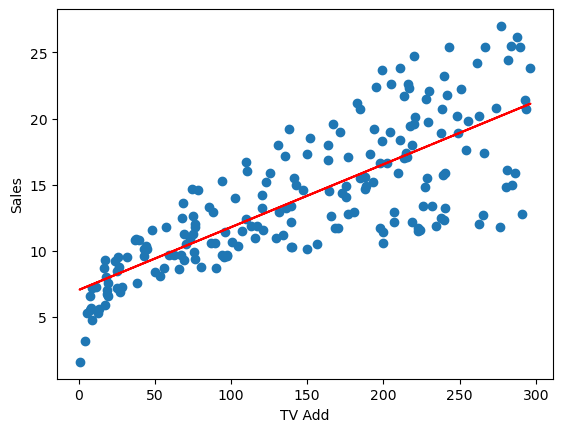

In [19]:
# Sales=7.032 + 0.047 * Tv
plt.scatter(df['TV'],df['Sales'])
plt.plot(df['TV'],y_pred,color='red')
plt.xlabel('TV Add')
plt.ylabel('Sales')
plt.show()

In [15]:
#Evaluate the model 
mse=mean_squared_error(y,y_pred)
print(f'mean square error {mse}')
mae=mean_absolute_error(y,y_pred)
print(f'mean absolute error {mae}')
rmse=root_mean_squared_error(y,y_pred)
print(f'root mean square error {rmse}')
r2score=r2_score(y,y_pred)
print(f'r2 score {r2score}')

mean square error 10.512652915656757
mean absolute error 2.549806038927486
root mean square error 3.2423221486546887
r2 score 0.611875050850071


In [16]:
# Prediction on unknown variable
tv_add=int(input('Tv Add value'))
print(f'Estimated Sales {lr.predict([[tv_add*1000]])}')

Tv Add value 450


Estimated Sales [[21398.52078841]]


In [22]:
# Multiple Regression
x=df[['TV','Radio','Newspaper']].values
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   

In [23]:
# Train the Model 
lr=LinearRegression()
lr.fit(x,y)         # training of model

LinearRegression()

In [24]:
y_pred=lr.predict(x)
print(y_pred)

[[20.52397441]
 [12.33785482]
 [12.30767078]
 [17.59782951]
 [13.18867186]
 [12.47834763]
 [11.72975995]
 [12.12295317]
 [ 3.72734086]
 [12.55084872]
 [ 7.0322992 ]
 [17.28512918]
 [10.57712073]
 [ 8.82630048]
 [18.43436638]
 [20.81929952]
 [12.82365674]
 [23.22495716]
 [ 9.95168206]
 [14.16607293]
 [18.10076728]
 [14.7405382 ]
 [ 6.4891503 ]
 [16.5459329 ]
 [ 8.14651887]
 [15.6100386 ]
 [14.98951429]
 [17.05167344]
 [19.41053803]
 [ 9.14402389]
 [21.6339338 ]
 [11.3460929 ]
 [ 7.63888314]
 [18.86426829]
 [ 7.57483051]
 [17.00682618]
 [23.40590052]
 [15.62347779]
 [ 9.90868103]
 [20.44761039]
 [16.37766467]
 [17.2959832 ]
 [21.59580326]
 [13.96385684]
 [ 8.88787996]
 [15.16152314]
 [ 8.87338673]
 [21.7226299 ]
 [16.26362018]
 [ 8.1681656 ]
 [12.63121132]
 [ 9.33981296]
 [20.66297563]
 [19.94469957]
 [20.37443008]
 [21.2926106 ]
 [ 8.52771254]
 [12.77458802]
 [21.89805198]
 [18.13348698]
 [ 5.74215558]
 [22.89067208]
 [16.78426073]
 [13.21069202]
 [16.97773556]
 [ 7.84904532]
 [ 9.01603

In [25]:
# Co efficient of linear regrssion 
print(f"B1 : {lr.coef_}")
print(f"B0 : {lr.intercept_}")

B1 : [[ 0.04576465  0.18853002 -0.00103749]]
B0 : [2.93888937]


In [27]:
# Sales=7.032 + 0.047 * Tv
#Evaluate the model 
mse=mean_squared_error(y,y_pred)
print(f'mean square error {mse}')
mae=mean_absolute_error(y,y_pred)
print(f'mean absolute error {mae}')
rmse=root_mean_squared_error(y,y_pred)
print(f'root mean square error {rmse}')
r2score=r2_score(y,y_pred)
print(f'r2 score {r2score}')

mean square error 2.784126314510936
mean absolute error 1.252011229687068
root mean square error 1.6685701407225697
r2 score 0.8972106381789522
